In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)

See [this reddit post](https://www.reddit.com/r/dataisbeautiful/comments/fkwova/oc_rna_sequence_of_covid19_this_8kb_of_data_is/), and [this data set](https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3). The data at the bottom can be massaged with `sed` and `tr` to produce [cov.ascii](./cov.ascii).

In [17]:
with open('cov.ascii', 'r') as f:
    cov_txt = f.read()[:-1]

In [18]:
cov_num = np.array([ord(c) for c in cov_txt])

In [20]:
nearest_sq = math.ceil(np.sqrt(len(cov_num)))

In [21]:
cov_num = np.pad(cov_num, (0, nearest_sq**2 - len(cov_num)))
cov_num = cov_num.reshape(nearest_sq, nearest_sq)

In [22]:
cov_num = np.where(cov_num == 97, 100, cov_num)
cov_num = np.where(cov_num == 99, 125, cov_num)
cov_num = np.where(cov_num == 103, 150, cov_num)
cov_num = np.where(cov_num == 116, 200, cov_num)

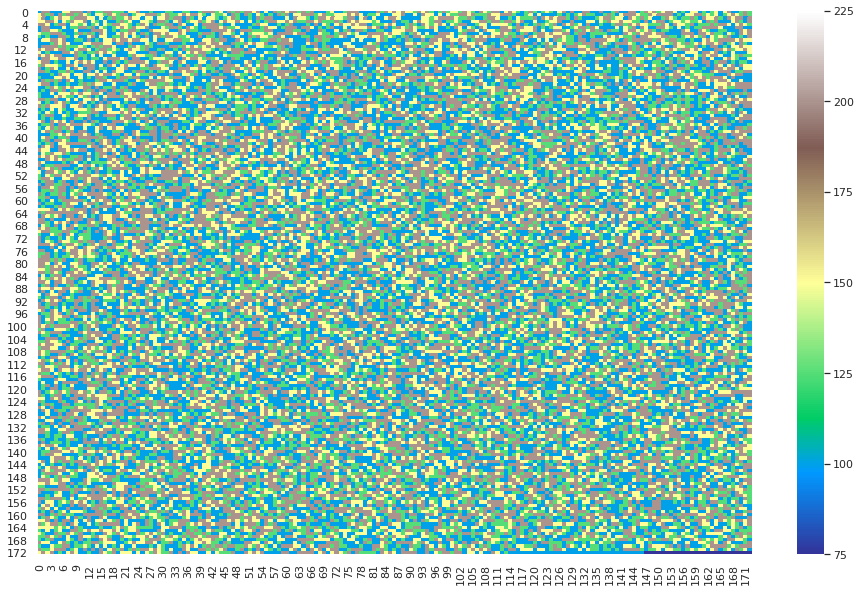

In [28]:
sns.heatmap(cov_num, vmin=75, vmax=225, cmap='terrain')